In [1]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA

In [2]:
project_path = 'C:\\Users\\danny\\Documents_Local\\Caltech_2023-2024\\CS101'

def join_path(relative_path: str) -> str:
    return os.path.join(project_path, relative_path)

def pickle_load(relative_path: str):  # -> pickled_file_contents
    return pickle.load(open(join_path(relative_path), 'rb'))

def pickle_save(obj: object, relative_path: str) -> None:
    pickle.dump(obj, open(join_path(relative_path), 'wb'))

In [4]:
ref = []
lens = []
for split_num in range(20):
    num = "0"*(2-len(str(split_num))) + str(split_num)
    ref.append(
        pickle_load(
            f'Data\\Split_Data_3\\List_Data\\reflectance_{num}_list.pkl'
        )
    )
    lens.append(ref[-1].shape[0])
ref = np.concatenate(ref, axis=0)
centers = ref.mean(axis=0)
pickle_save(centers, 'Data\\Split_Data_3\\Full_PCA\\channel_centers.pkl')
# pickle_save(centers, 'Data\\Split_Data_3\\KPCA\\Sigmoid\\channel_centers.pkl')

In [5]:
pca = PCA(n_components=ref.shape[1], whiten=True)
ref_pca = pca.fit_transform(ref)
pickle_save(pca, 'Data\\Split_Data_3\\Full_PCA\\pca_object.pkl')

In [6]:
saved = 0
path_template = 'Data\\Split_Data_3\\Full_PCA\\reflectance_(**)_pca244.pkl'
for split_num, length in enumerate(lens):
    pickle_save(
        ref_pca[saved:saved + length, :],
        path_template.replace(
            '(**)', "0"*(2-len(str(split_num))) + str(split_num)
        )
    )
    saved += length

# Kernel PCA

In [6]:
kpca = KernelPCA(n_components=ref.shape[1], kernel='sigmoid')
ref_kpca = kpca.fit(ref[::40, :])
pickle_save(kpca, 'Data\\Split_Data_2\\KPCA\\Sigmoid\\pca_object.pkl')

In [ ]:
for split_num in range(20):
    num = "0"*(2-len(str(split_num))) + str(split_num)
    pickle_save(
        kpca.transform(
            pickle_load(
                f'Data\\Split_Data_2\\List_Data\\reflectance_{num}_list.pkl'
            )
        ),
        f'Data\\Split_Data_2\\KPCA\\Sigmoid\\reflectance_{num}_list.pkl'
    )

In [ ]:
# ref_kpca = kpca.fit_transform(ref)

# saved = 0
# path_template = 'Data\\Split_Data_2\\KPCA\\Sigmoid\\reflectance_(**)_list.pkl'
# for split_num, length in enumerate(lens):
#     pickle_save(
#         ref_pca[saved:saved + length, :8],
#         path_template.replace(
#             '(**)', "0"*(2-len(str(split_num))) + str(split_num)
#         )
#     )
#     saved += length

# Visualization

In [19]:
(
    [(i, sum(pca.explained_variance_ratio_[:i]), pca.explained_variance_ratio_[i-1]) for i in range(1, len(pca.explained_variance_ratio_) + 1)][:]
)

[(1, 0.8068473063831773, 0.8068473063831773),
 (2, 0.9261968585610056, 0.11934955217782839),
 (3, 0.9790652017579471, 0.05286834319694144),
 (4, 0.9865313440951873, 0.007466142337240192),
 (5, 0.993095705452254, 0.006564361357066686),
 (6, 0.9969302378318627, 0.0038345323796087163),
 (7, 0.9977236691886485, 0.0007934313567858261),
 (8, 0.9982922573662417, 0.0005685881775931887),
 (9, 0.9986404360898106, 0.0003481787235688755),
 (10, 0.9988610534409328, 0.00022061735112226076),
 (11, 0.999074376329764, 0.00021332288883129025),
 (12, 0.9992363774515245, 0.00016200112176051),
 (13, 0.999341634853288, 0.00010525740176351807),
 (14, 0.9994428637583485, 0.00010122890506053043),
 (15, 0.9995215451721531, 7.868141380462738e-05),
 (16, 0.9995829921015209, 6.144692936787256e-05),
 (17, 0.999628742595502, 4.575049398112886e-05),
 (18, 0.9996712227528025, 4.2480157300452645e-05),
 (19, 0.9997043535459628, 3.3130793160260286e-05),
 (20, 0.9997351766841825, 3.082313821980222e-05),
 (21, 0.9997632006

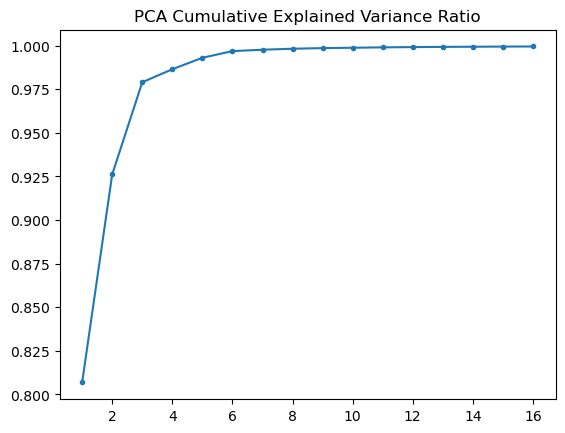

In [10]:
fig, ax = plt.subplots()
ax.set_title('PCA Cumulative Explained Variance Ratio')
ax.plot(
    [i for i in range(1, len(pca.explained_variance_ratio_) + 1)][:16],
    [sum(pca.explained_variance_ratio_[:i])
        for i in range(1, len(pca.explained_variance_ratio_) + 1)
    ][:16],
    marker='.'
)

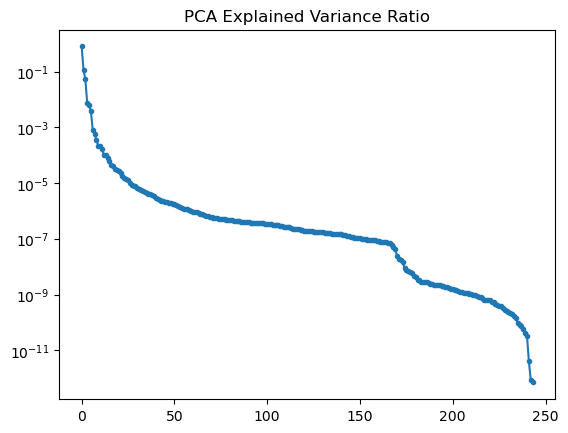

In [12]:
fig, ax = plt.subplots()
ax.set_title('PCA Explained Variance Ratio')
ax.semilogy(pca.explained_variance_ratio_, marker='.')

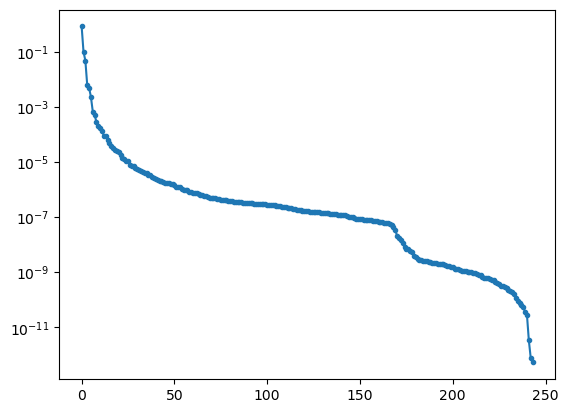

In [11]:
plt.semilogy(pca.explained_variance_ratio_, marker='.')

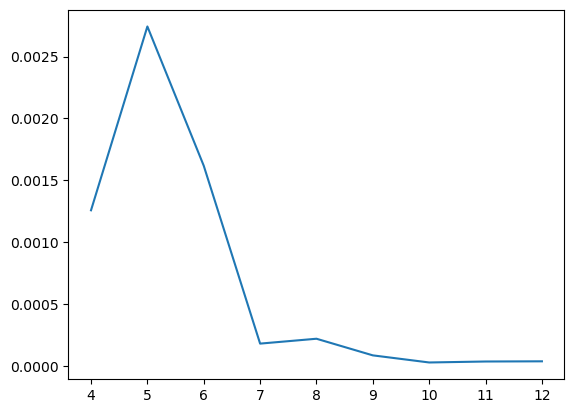

In [12]:
plt.plot(np.arange(4,13),
    (
        np.array(
            [
                pca.explained_variance_ratio_[i]
                for i in range(0,len(pca.explained_variance_ratio_))
            ]
        )[:-1]
        - np.array(
            [
                pca.explained_variance_ratio_[i]
                for i in range(1,len(pca.explained_variance_ratio_))
            ]
        )
    )[3:12]
)

In [13]:
import pandas as pd

pd.DataFrame(
    {
        'Number of Components' : np.arange(1, 245),
        'Cumulative Explained Variance Ratio' : [
                sum(pca.explained_variance_ratio_[:i])
                for i in range(1,len(pca.explained_variance_ratio_) + 1)
        ],
        'Explained Variance Ratio' : pca.explained_variance_ratio_,
    }
).to_csv(join_path('Data\\Split_Data_3\\Full_PCA\\Explained_Variance.csv'))

In [31]:
11.863*np.sqrt([.1254,.6908])

array([4.20090924, 9.85985878])

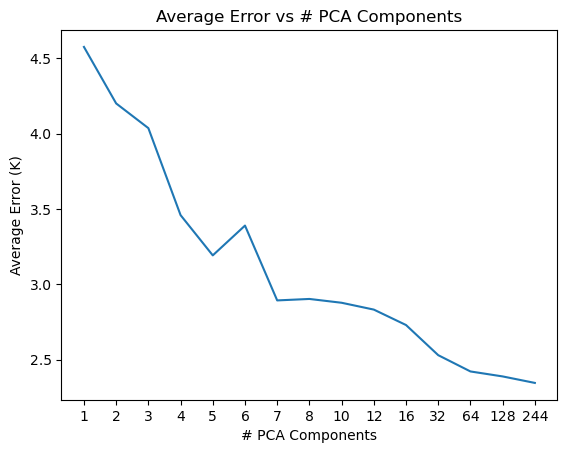

In [27]:
n = [1,2,3,4,5,6,7,8,10,12,16,32,64,128,244]
w = 11.863*np.sqrt(
    [
        .1488,.1254,.1158,.08504,.07241,.08166,.05948,
        .05988,.05884,.057,.05295,.04547,.04167,.04054,.03909
    ]
)
fig, ax = plt.subplots()
ax.set_title('Average Error vs # PCA Components')
ax.plot(np.arange(1,len(n)+1),w)
ax.set_xlabel('# PCA Components')
ax.set_ylabel('Average Error (K)')
ax.set_xticks(np.arange(1,len(n)+1))
ax.set_xticklabels(n)
plt.show(fig)